In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
import nelpy as nel
from scipy.signal import find_peaks
from reactivation import AssemblyReact, load_cell_metrics, load_epochs, load_ripples_events, load_SleepState_states, load_spikes, event_triggered_average_fast

## A015_day12

### Loading

In [6]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name_A015_day12 = 'A015_day12'

assembly_react_A015_day12 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name_A015_day12,
    brainRegion="CA2-CA3",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

#swr= load_ripples_events('D:/Research Topic/tristan/step10_olivadata', 'A015_day12')

In [8]:
assembly_react_A015_day12.load_data()
assembly_react_A015_day12

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 20 units> of length 4:12:53:383 hours

In [10]:
assembly_react_A015_day12.restrict_epochs_to_pre_task_post()

### Peak Assembly reactivation A015_day12

In [13]:
assembly_react_A015_day12.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,7968.70,10526.90
5,2novel_exposure,10526.90,10816.55
7,rest_post2,11100.15,14932.15


In [15]:
assembly_react_A015_day12.st

<SpikeTrainArray at 0x2513656dcc0: 20 units (9 segments)> at 30000 Hz

In [17]:
#assembly_react_A015_day12.cell_metrics

In [19]:
state_dict_A015_day12 = load_SleepState_states(project_path, mice_name_A015_day12)

wake_epoch = nel.EpochArray(
    state_dict_A015_day12["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A015_day12["NREMepisode"],
)


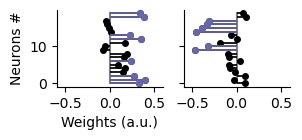

In [21]:
assembly_react_A015_day12.get_weights(epoch= assembly_react_A015_day12.epochs[1] & wake_epoch)
assembly_react_A015_day12.plot()
plt.show()

In [103]:
assembly_act_pre_A015_day12 = assembly_react_A015_day12.get_assembly_act(assembly_react_A015_day12.epochs[0] & nrem_epochs) 
assembly_act_pre_A015_day12

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


<AnalogSignalArray at 0x2513b511d50: 2 signals (2 segments)> for a total of 19:57 minutes

In [105]:
assembly_act_post_A015_day12 = assembly_react_A015_day12.get_assembly_act(assembly_react_A015_day12.epochs[2] & nrem_epochs) 
assembly_act_post_A015_day12

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


<AnalogSignalArray at 0x2513bfb78b0: 2 signals (3 segments)> for a total of 27:27 minutes

In [107]:
assembly_act_pre_A015_day12.data

array([[ 0.24592017,  0.24592017,  0.24592017, ...,  0.24392171,
        -0.56101031,  0.69878617],
       [ 0.14383068,  0.14383068,  0.14383068, ...,  0.1433301 ,
        -0.05917993, -1.696219  ]])

In [109]:
assembly_act_post_A015_day12.data

array([[ 0.24094165,  0.24186881,  0.6111287 , ...,  0.23909864,
         0.23820605, -1.31201317],
       [ 0.17281433,  0.16901856, -1.35248722, ...,  0.17229851,
         0.16948211, -0.73435611]])

In [111]:
act_pre_sleep_above_A015_day12 = np.where(assembly_act_pre_A015_day12.data[:] > 5, assembly_act_pre_A015_day12.data[:], 0)
act_pre_sleep_above_A015_day12

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [113]:
act_post_sleep_above_A015_day12 = np.where(assembly_act_post_A015_day12.data[:] > 5, assembly_act_post_A015_day12.data[:], 0)
act_post_sleep_above_A015_day12[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [131]:
act_pre_sleep_above_A015_day12

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [137]:
act_pre_sleep_above_A015_day12_test = act_pre_sleep_above_A015_day12
assembly_act_post_A015_day12_test = act_post_sleep_above_A015_day12
sampling_rate = 1  # Replace with actual rate

# Define the duration of each bin in seconds
bin_duration = 60

def compute_peak_averages(data):
    bin_size = bin_duration * sampling_rate
    bins = np.array_split(data, len(data) // bin_size)
    peak_averages = []
    for bin_data in bins:
        peaks, _ = find_peaks(bin_data)
        if peaks.size > 0:
            peak_values = bin_data[peaks]
            peak_averages.append(np.mean(peak_values))
        else:
            peak_averages.append(0)  # No peaks found
    return np.array(peak_averages)

reactivation_rates = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A015_day12_test, assembly_act_post_A015_day12_test):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates)

Reactivation Rates: [0.015623309218521885, 0.04562411333383476]


In [172]:
Peak_reactivation_Joint_A015_day12 = reactivation_rates[0]
Peak_reactivation_Joint_A015_day12

0.015623309218521885

## A015_day8

### Loading data

In [510]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A015_day8'

assembly_react_A015_day8 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA3",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

#swr= load_ripples_events('D:/Research Topic/tristan/step10_olivadata', 'A015_day8')

In [511]:
assembly_react_A015_day8.load_data()
assembly_react_A015_day8

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 17 units> of length 2:14:32:983 hours

In [512]:
assembly_react_A015_day8.restrict_epochs_to_pre_task_post()

In [513]:
assembly_react_A015_day8.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,2315.666667,4884.883333
5,2novel_exposure,4884.883333,5105.450000
7,rest_post2,5295.633333,7846.250000


In [514]:
assembly_react_A015_day8.st

<SpikeTrainArray at 0x189b0c70b20: 17 units (9 segments)> at 30000 Hz

In [515]:
assembly_react_A015_day8.cell_metrics

,Type,Region,Modulation,CluID
8,pyr,CA2,positive,8
13,pyr,CA2,positive,13
16,pyr,CA2,positive,16
17,pyr,CA2,positive,17
20,pyr,CA2,positive,20
0,pyr,CA3,positive,0
1,pyr,CA3,positive,1
4,pyr,CA3,positive,4
5,pyr,CA3,positive,5
6,pyr,CA3,negative,6


In [516]:
state_dict_A015_day8 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A015_day8["WAKEstate"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A015_day8["NREMstate"],
)


### Peak Reactivation strength

In [518]:
#assembly_react_A015_day8.get_weights(epoch= assembly_react_A015_day8.epochs[1])
#assembly_react_A015_day8.plot()
#plt.show()

In [519]:
#assembly_react_A015_day8.find_members()

In [520]:
#assembly_act_pre_A015_day8 = assembly_react_A015_day8.get_assembly_act(assembly_react_A015_day8.epochs[0] & nrem_epochs) 
#assembly_act_pre_A015_day8

In [521]:
#assembly_act_post_A015_day8 = assembly_react_A015_day8.get_assembly_act(assembly_react_A015_day8.epochs[2] & nrem_epochs) 
#assembly_act_post_A015_day8

In [522]:
#act_pre_sleep_above_A015_day8 = np.where(assembly_act_pre_A015_day8.data[:] > 5, assembly_act_pre_A015_day8.data[:], 0)
#act_pre_sleep_above_A015_day8

In [523]:
#act_post_sleep_above_A015_day8 = np.where(assembly_act_post_A015_day8.data[:] > 5, assembly_act_post_A015_day8.data[:], 0)
#act_post_sleep_above_A015_day8

In [524]:
#Peak_reactivation_Joint_A015_day8 = np.mean(act_post_sleep_above_A015_day8[0]) - np.mean(act_pre_sleep_above_A015_day8[0])
#Peak_reactivation_Joint_A015_day8

## AO13_day7

### Loading

In [139]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A013_day7'

assembly_react_A013_day7 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA3",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )


In [141]:
assembly_react_A013_day7.load_data()
assembly_react_A013_day7

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 30 units> of length 3:17:28:083 hours

In [142]:
assembly_react_A013_day7.restrict_epochs_to_pre_task_post()

In [145]:
assembly_react_A013_day7.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,4803.033333,5598.166667
5,2novel_exposure,5598.166667,5954.583333
7,rest_post2,6203.716667,10313.616667


In [147]:
assembly_react_A013_day7.st

<SpikeTrainArray at 0x2513c0f76a0: 30 units (10 segments)> at 30000 Hz

In [149]:
assembly_react_A013_day7.cell_metrics

,Type,Region,Modulation,CluID
1,pyr,CA2,positive,1
3,pyr,CA2,positive,3
4,pyr,CA2,positive,4
6,pyr,CA2,positive,6
8,pyr,CA2,positive,8
9,pyr,CA2,negative,9
17,pyr,CA2,negative,17
18,pyr,CA2,positive,18
19,pyr,CA2,negative,19
20,pyr,CA2,negative,20


In [151]:
state_dict_A013_day7 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A013_day7["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A013_day7["NREMepisode"],
)


### Peak reactivation

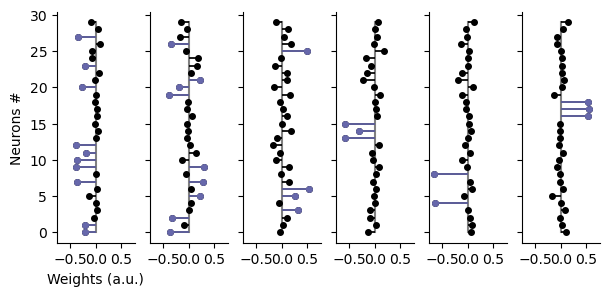

In [154]:
assembly_react_A013_day7.get_weights(epoch= assembly_react_A013_day7.epochs[1] & wake_epoch)
assembly_react_A013_day7.plot()
plt.show()

In [156]:
assembly_act_pre_A013_day7 = assembly_react_A013_day7.get_assembly_act(assembly_react_A013_day7.epochs[0] & nrem_epochs) 
assembly_act_pre_A013_day7

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


<AnalogSignalArray at 0x2513ff7b6a0: 6 signals (3 segments)> for a total of 7:40 minutes

In [158]:
assembly_act_post_A013_day7 = assembly_react_A013_day7.get_assembly_act(assembly_react_A013_day7.epochs[2] & nrem_epochs) 
assembly_act_post_A013_day7

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


<AnalogSignalArray at 0x2513c0e6740: 6 signals (2 segments)> for a total of 1:05:14:875 hours

In [160]:
act_pre_sleep_above_A013_day7 = np.where(assembly_act_pre_A013_day7.data[:] > 5, assembly_act_pre_A013_day7.data[:], 0)
act_post_sleep_above_A013_day7 = np.where(assembly_act_post_A013_day7.data[:] > 5, assembly_act_post_A013_day7.data[:], 0)

In [162]:
act_pre_sleep_above_A013_day7_test = act_pre_sleep_above_A013_day7
assembly_act_post_A013_day7_test = act_post_sleep_above_A013_day7
sampling_rate = 1  # Replace with actual rate

# Define the duration of each bin in seconds
bin_duration = 60
reactivation_rates_A013_day7 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A013_day7_test, assembly_act_post_A013_day7_test):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A013_day7.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A013_day7)

Reactivation Rates: [0.12265009615797694, -0.033039774799155416, 0.35095158581036767, 0.21115159368171882, -0.26921338674721956, 0.32910105875322576]


In [168]:
Peak_reactivation_Joint_A013_day7 = reactivation_rates_A013_day7[0:3]
Peak_reactivation_Joint_A013_day7

[0.12265009615797694, -0.033039774799155416, 0.35095158581036767]

In [170]:
Peak_reactivation_CA2_A013_day7 = reactivation_rates_A013_day7[3:]
Peak_reactivation_CA2_A013_day7

[0.21115159368171882, -0.26921338674721956, 0.32910105875322576]

## A013_day15

In [174]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A013_day15'

assembly_react_A013_day15 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [176]:
assembly_react_A013_day15.load_data()
assembly_react_A013_day15

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 52 units> of length 4:57:37:533 hours

In [178]:
assembly_react_A013_day15.restrict_epochs_to_pre_task_post()

In [180]:
assembly_react_A013_day15.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,3907.066667,6102.083333
5,2novel_exposure,6102.083333,6344.233333
7,rest_post2,6572.450000,10804.400000


In [182]:
assembly_react_A013_day15.st

<SpikeTrainArray at 0x251406379d0: 52 units (10 segments)> at 30000 Hz

In [184]:
state_dict_A013_day15 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A013_day15["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A013_day15["NREMepisode"],
)


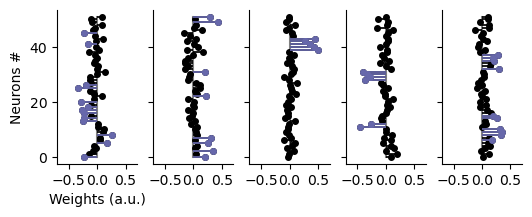

In [186]:
assembly_react_A013_day15.get_weights(epoch= assembly_react_A013_day15.epochs[1] & wake_epoch)
assembly_react_A013_day15.plot()
plt.show()

In [188]:
assembly_act_pre_A013_day15 = assembly_react_A013_day15.get_assembly_act(assembly_react_A013_day15.epochs[0] & nrem_epochs) 
assembly_act_post_A013_day15 = assembly_react_A013_day15.get_assembly_act(assembly_react_A013_day15.epochs[2] & nrem_epochs) 
act_pre_sleep_above_A013_day15 = np.where(assembly_act_pre_A013_day15.data[:] > 5, assembly_act_pre_A013_day15.data[:], 0)
act_post_sleep_above_A013_day15 = np.where(assembly_act_post_A013_day15.data[:] > 5, assembly_act_post_A013_day15.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [190]:

sampling_rate = 1  # Replace with actual rate

# Define the duration of each bin in seconds
bin_duration = 60
reactivation_rates_A013_day15 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A013_day15, act_post_sleep_above_A013_day15):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A013_day15.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A013_day15)

Reactivation Rates: [0.24465132738494672, 0.031853891397470906, 0.07979555565717368, 0.24096590000489707, 0.22615879767177785]


In [196]:
Peak_reactivation_CA2_A013_day15 = reactivation_rates_A013_day15
Peak_reactivation_CA2_A013_day15

[0.24465132738494672,
 0.031853891397470906,
 0.07979555565717368,
 0.24096590000489707,
 0.22615879767177785]

## A013_day13

In [198]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A013_day13'

assembly_react_A013_day13 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [200]:
assembly_react_A013_day13.load_data()
assembly_react_A013_day13

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 46 units> of length 3:17:07:583 hours

In [202]:
assembly_react_A013_day13.restrict_epochs_to_pre_task_post()

In [204]:
assembly_react_A013_day13.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,4557.216667,8314.366667
5,2novel_exposure,8314.366667,8569.333333
7,rest_post2,8820.266667,11501.800000


In [206]:
assembly_react_A013_day13.st

<SpikeTrainArray at 0x2513ff78700: 46 units (9 segments)> at 30000 Hz

In [208]:
state_dict_A013_day13 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A013_day13["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A013_day13["NREMepisode"],
)

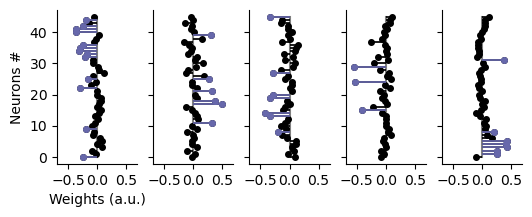

In [210]:
assembly_react_A013_day13.get_weights(epoch= assembly_react_A013_day13.epochs[1] & wake_epoch)
assembly_react_A013_day13.plot()
plt.show()

In [212]:
assembly_act_pre_A013_day13 = assembly_react_A013_day13.get_assembly_act(assembly_react_A013_day13.epochs[0] & nrem_epochs) 
assembly_act_post_A013_day13 = assembly_react_A013_day13.get_assembly_act(assembly_react_A013_day13.epochs[2] & nrem_epochs) 
act_pre_sleep_above_A013_day13 = np.where(assembly_act_pre_A013_day13.data[:] > 5, assembly_act_pre_A013_day13.data[:], 0)
act_post_sleep_above_A013_day13 = np.where(assembly_act_post_A013_day13.data[:] > 5, assembly_act_post_A013_day13.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [214]:
sampling_rate = 1  # Replace with actual rate

# Define the duration of each bin in seconds
bin_duration = 60
reactivation_rates_A013_day13 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A013_day13, act_post_sleep_above_A013_day13):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A013_day13.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A013_day13)

Reactivation Rates: [0.08289475126544214, 0.09650729438451001, -0.0527710632329173, 0.06629918751944099, 0.1421631538393568]


In [218]:
Peak_reactivation_CA2_A013_day13 = reactivation_rates_A013_day13

## A012_day15


In [220]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A012_day15'

assembly_react_A012_day15 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA1",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [222]:
assembly_react_A012_day15.load_data()
assembly_react_A012_day15

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 84 units> of length 5:13:52:900 hours

In [224]:
assembly_react_A012_day15.restrict_epochs_to_pre_task_post()

In [226]:
assembly_react_A012_day15.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,4319.833333,6962.466667
5,2novel_exposure,6962.466667,7207.216667
7,rest_post2,7509.900000,12106.666667


In [228]:
assembly_react_A012_day15.st

<SpikeTrainArray at 0x2513c0f94b0: 84 units (10 segments)> at 30000 Hz

In [230]:
#x = assembly_react_A012_day15.cell_metrics
#x[0:29]

In [232]:
state_dict_A012_day15 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A012_day15["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A012_day15["NREMepisode"],
)

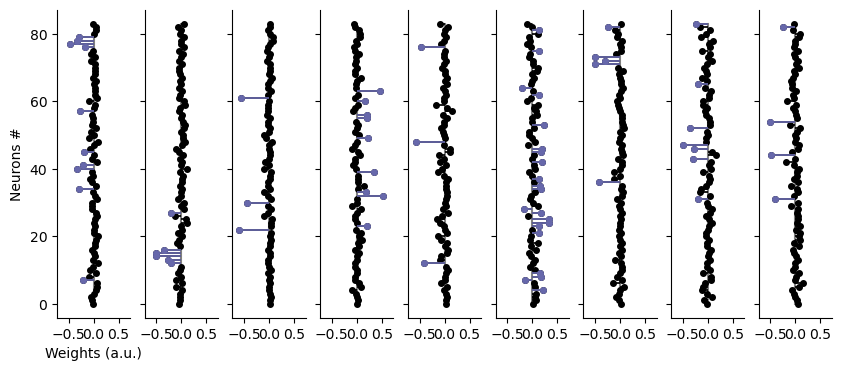

In [234]:
assembly_react_A012_day15.get_weights(epoch= assembly_react_A012_day15.epochs[1] & wake_epoch)
assembly_react_A012_day15.plot()
plt.show()

In [236]:
assembly_act_pre_A012_day15 = assembly_react_A012_day15.get_assembly_act(assembly_react_A012_day15.epochs[0] & nrem_epochs) 
assembly_act_post_A012_day15 = assembly_react_A012_day15.get_assembly_act(assembly_react_A012_day15.epochs[2] & nrem_epochs) 
act_pre_sleep_above_A012_day15 = np.where(assembly_act_pre_A012_day15.data[:] > 5, assembly_act_pre_A012_day15.data[:], 0)
act_post_sleep_above_A012_day15 = np.where(assembly_act_post_A012_day15.data[:] > 5, assembly_act_post_A012_day15.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [262]:
sampling_rate = 1  # Replace with actual rate

# Define the duration of each bin in seconds
bin_duration = 60
reactivation_rates_A012_day15 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A012_day15, act_post_sleep_above_A012_day15):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A012_day15.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A012_day15)

Reactivation Rates: [0.07568658142134174, 1.585511863876807, 1.862281768907273, 0.6166465677644315, -1.7857142857142856, 0.3886393643148925, 2.1121763574754864, 0.1423942051739947, 0.7239335389381895]


In [264]:
reactivation_rates_A012_day15[0]

0.07568658142134174

In [270]:
num_ass = 9
Peak_reactivation_CA2_A012_day15 = []  
Peak_reactivation_CA1_A012_day15 = []
Peak_reactivation_JointCA1_CA2_A012_day15 = []

for i in range(num_ass):
    x = reactivation_rates_A012_day15[i]
    if i == 1:
        Peak_reactivation_CA2_A012_day15.append(x)
    elif i in {6, 7, 8}:
        Peak_reactivation_CA1_A012_day15.append(x)
    else:
        Peak_reactivation_JointCA1_CA2_A012_day15.append(x)

Peak_reactivation_JointCA1_CA2_A012_day15, Peak_reactivation_CA1_A012_day15, Peak_reactivation_CA2_A012_day15

([0.07568658142134174,
  1.862281768907273,
  0.6166465677644315,
  -1.7857142857142856,
  0.3886393643148925],
 [2.1121763574754864, 0.1423942051739947, 0.7239335389381895],
 [1.585511863876807])

## A010_day26


In [272]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A010_day26'

assembly_react_A010_day26 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA1",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [274]:
assembly_react_A010_day26.load_data()
assembly_react_A010_day26

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 26 units> of length 5:06:05:050 hours

In [275]:
assembly_react_A010_day26.restrict_epochs_to_pre_task_post()

In [277]:
assembly_react_A010_day26.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,8177.133333,12620.85
5,2novel_exposure,12620.850000,12920.05
7,rest_post2,13236.200000,15553.10


In [280]:
assembly_react_A010_day26.st

<SpikeTrainArray at 0x25146086140: 26 units (10 segments)> at 30000 Hz

In [282]:
x = assembly_react_A010_day26.cell_metrics
x[24:26]

,Type,Region,Modulation,CluID
1,pyr,CA1,negative,1
32,pyr,CA1,positive,32


In [284]:
state_dict_A010_day26 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A010_day26["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A010_day26["NREMepisode"],
)

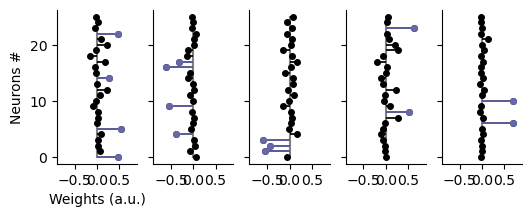

In [286]:
assembly_react_A010_day26.get_weights(epoch= assembly_react_A010_day26.epochs[1] & wake_epoch)
assembly_react_A010_day26.plot()
plt.show()

In [288]:
assembly_act_pre_A010_day26 = assembly_react_A010_day26.get_assembly_act(assembly_react_A010_day26.epochs[0] & nrem_epochs) 
assembly_act_post_A010_day26 = assembly_react_A010_day26.get_assembly_act(assembly_react_A010_day26.epochs[2] & nrem_epochs) 
act_pre_sleep_above_A010_day26 = np.where(assembly_act_pre_A010_day26.data[:] > 5, assembly_act_pre_A010_day26.data[:], 0)
act_post_sleep_above_A010_day26 = np.where(assembly_act_post_A010_day26.data[:] > 5, assembly_act_post_A010_day26.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [290]:
sampling_rate = 1  # Replace with actual rate

# Define the duration of each bin in seconds
bin_duration = 60
reactivation_rates_A010_day26 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A010_day26, act_post_sleep_above_A010_day26):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A010_day26.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A010_day26)

Reactivation Rates: [-0.09816249835382419, -0.029126566203707255, 0.02113602734649363, 0.09812118849347753, 0.1662438838857524]


In [292]:
Peak_reactivation_CA2_A010_day26 = reactivation_rates_A010_day26

## A010_day14

In [294]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A010_day14'

assembly_react_A010_day14 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA1",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [296]:
assembly_react_A010_day14.load_data()
assembly_react_A010_day14

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 34 units> of length 7:28:53:100 hours

In [297]:
assembly_react_A010_day14.restrict_epochs_to_pre_task_post()

In [298]:
assembly_react_A010_day14.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,9647.350000,16040.783333
5,2novel_exposure,16040.783333,16652.183333
7,rest_post2,17231.616667,22221.733333


In [299]:
assembly_react_A010_day14.st

<SpikeTrainArray at 0x2514009e290: 34 units (10 segments)> at 30000 Hz

In [316]:
assembly_react_A010_day14.cell_metrics

,Type,Region,Modulation,CluID
0,pyr,CA2,positive,0
1,pyr,CA2,positive,1
2,pyr,CA2,positive,2
3,pyr,CA2,positive,3
4,pyr,CA2,positive,4
5,pyr,CA2,positive,5
6,pyr,CA2,positive,6
8,pyr,CA2,positive,8
11,pyr,CA2,positive,11
13,pyr,CA2,positive,13


In [306]:
state_dict_A010_day14 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A010_day14["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A010_day14["NREMepisode"],
)

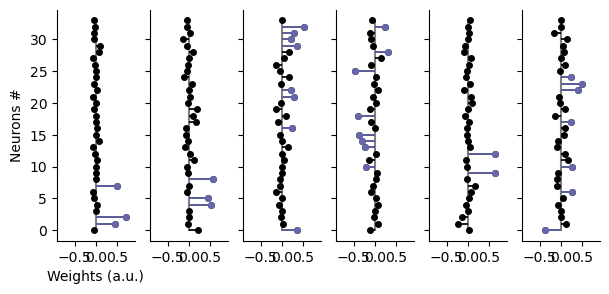

In [307]:
assembly_react_A010_day14.get_weights(epoch= assembly_react_A010_day14.epochs[1] & wake_epoch)
assembly_react_A010_day14.plot()
plt.show()

In [310]:
assembly_act_pre_A010_day14 = assembly_react_A010_day14.get_assembly_act(assembly_react_A010_day14.epochs[0] & nrem_epochs) 
assembly_act_post_A010_day14 = assembly_react_A010_day14.get_assembly_act(assembly_react_A010_day14.epochs[2] & nrem_epochs) 
act_pre_sleep_above_A010_day14 = np.where(assembly_act_pre_A010_day14.data[:] > 5, assembly_act_pre_A010_day14.data[:], 0)
act_post_sleep_above_A010_day14 = np.where(assembly_act_post_A010_day14.data[:] > 5, assembly_act_post_A010_day14.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [312]:
sampling_rate = 1  # Replace with actual rate

# Define the duration of each bin in seconds
bin_duration = 60
reactivation_rates_A010_day14 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A010_day14, act_post_sleep_above_A010_day14):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A010_day14.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A010_day14)

Reactivation Rates: [-0.5992897851512834, -0.701101204884914, 0.03083389599001703, -0.07602799204995474, 0.16481943896393275, 0.07652734839450913]


In [314]:
num_ass = 6
Peak_reactivation_CA2_A010_day14 = [] 
Peak_reactivation_JointCA1_CA2_A010_day14 = []

for i in range(num_ass):
    reactivation_value = reactivation_rates_A010_day14[i]
    if i in {2,3}:
        Peak_reactivation_JointCA1_CA2_A010_day14.append(reactivation_value)
    else:
        Peak_reactivation_CA2_A010_day14.append(reactivation_value)

Peak_reactivation_CA2_A010_day14, Peak_reactivation_JointCA1_CA2_A010_day14

([-0.5992897851512834,
  -0.701101204884914,
  0.16481943896393275,
  0.07652734839450913],
 [0.03083389599001703, -0.07602799204995474])

## Peak Reactivation Strength

In [318]:
CA2_react = [*Peak_reactivation_CA2_A010_day14, *Peak_reactivation_CA2_A010_day26, *Peak_reactivation_CA2_A012_day15,
             *Peak_reactivation_CA2_A013_day13,*Peak_reactivation_CA2_A013_day15, *Peak_reactivation_CA2_A013_day7]
#CA3_react = [Peak_reactivation_CA3_A015_day12]
CA2_CA3_react = [*Peak_reactivation_Joint_A013_day7, Peak_reactivation_Joint_A015_day12]
CA1_react = [*Peak_reactivation_CA1_A012_day15]
CA1_CA2_react = [*Peak_reactivation_JointCA1_CA2_A012_day15]

#A015_DAY 8 IS WEIRED CAUSE IT DOESNT RESTRICT TO WAKE EPOCH

In [320]:
df = dict(CA2 = CA2_react,
      CA2_CA3 = CA2_CA3_react,
      CA1 = CA1_react,
CA1_CA2 = CA1_CA2_react)
Peak_Reactivation_Strength = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in df.items() ]))

In [322]:
df

{'CA2': [-0.5992897851512834,
  -0.701101204884914,
  0.16481943896393275,
  0.07652734839450913,
  -0.09816249835382419,
  -0.029126566203707255,
  0.02113602734649363,
  0.09812118849347753,
  0.1662438838857524,
  1.585511863876807,
  0.08289475126544214,
  0.09650729438451001,
  -0.0527710632329173,
  0.06629918751944099,
  0.1421631538393568,
  0.24465132738494672,
  0.031853891397470906,
  0.07979555565717368,
  0.24096590000489707,
  0.22615879767177785,
  0.21115159368171882,
  -0.26921338674721956,
  0.32910105875322576],
 'CA2_CA3': [0.12265009615797694,
  -0.033039774799155416,
  0.35095158581036767,
  0.015623309218521885],
 'CA1': [2.1121763574754864, 0.1423942051739947, 0.7239335389381895],
 'CA1_CA2': [0.07568658142134174,
  1.862281768907273,
  0.6166465677644315,
  -1.7857142857142856,
  0.3886393643148925]}

In [324]:
Peak_Reactivation_Strength

,CA2,CA2_CA3,CA1,CA1_CA2
0,-0.599290,0.122650,2.112176,0.075687
1,-0.701101,-0.033040,0.142394,1.862282
2,0.164819,0.350952,0.723934,0.616647
3,0.076527,0.015623,NaN,-1.785714
4,-0.098162,NaN,NaN,0.388639
5,-0.029127,NaN,NaN,NaN
6,0.021136,NaN,NaN,NaN
7,0.098121,NaN,NaN,NaN
8,0.166244,NaN,NaN,NaN
9,1.585512,NaN,NaN,NaN


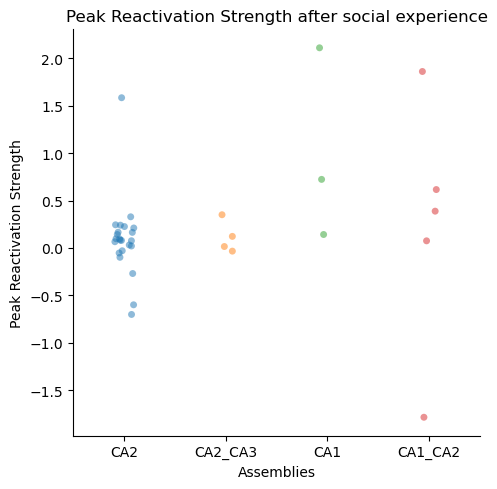

In [326]:
sns.catplot(data=Peak_Reactivation_Strength, jitter=True,  alpha=0.5)

# Overlay with the means using pointplot
#sns.pointplot(data=Peak_Reactivation_Strength, ci=None, markers="D",  scale=1.5)

# Customize the plot for better appearance
plt.title("Peak Reactivation Strength after social experience")
plt.xlabel("Assemblies")
plt.ylabel("Peak Reactivation Strength")
plt.xticks()
plt.grid(False)
plt.tight_layout()

plt.show()